In [1]:
import numpy as np
import pandas as pd

In [2]:
df_pred = pd.read_csv("C:\\Users\\shaur\\Downloads\\Car Price Prediction\\car data.csv")

In [3]:
df_pred.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df = pd.read_csv("C:\\Users\\shaur\\Downloads\\Car Price Prediction\\CAR DETAILS FROM CAR DEKHO.csv")

In [6]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


<h3> Checking Missing Values

In [7]:
df.shape

(4340, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
name             4340 non-null object
year             4340 non-null int64
selling_price    4340 non-null int64
km_driven        4340 non-null int64
fuel             4340 non-null object
seller_type      4340 non-null object
transmission     4340 non-null object
owner            4340 non-null object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [9]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [10]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [11]:
df[df.isnull().any(1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner


<h3> Feature Analysis

In [12]:
df['name'].value_counts()

Maruti Swift Dzire VDI                  69
Maruti Alto 800 LXI                     59
Maruti Alto LXi                         47
Maruti Alto LX                          35
Hyundai EON Era Plus                    35
                                        ..
Hyundai Verna 1.4 EX                     1
Mercedes-Benz E-Class E250 Edition E     1
Maruti Swift Dzire AMT ZXI               1
Mahindra Scorpio VLX 2WD BSIII           1
Maruti Zen LX - BS III                   1
Name: name, Length: 1491, dtype: int64

In [13]:
def distinct_values(df):
    col = df.columns
    for c in col:
        if df[c].value_counts().count() < 30:
            print("Feature name : {}".format(c))
            print(df[c].value_counts())
            print("Distinct Values : {}".format(df[c].value_counts().count()))
            print("-----------------------------")

In [14]:
distinct_values(df)

Feature name : year
2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64
Distinct Values : 27
-----------------------------
Feature name : fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Distinct Values : 5
-----------------------------
Feature name : seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Distinct Values : 3
-----------------------------
Feature name : transmission
Manual       3892
Automatic     448
Name: transmission, dtype: int64
Distinct Values : 2
-----------------------------
Feature name : owner
First Owner             2832
Second Owner       

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

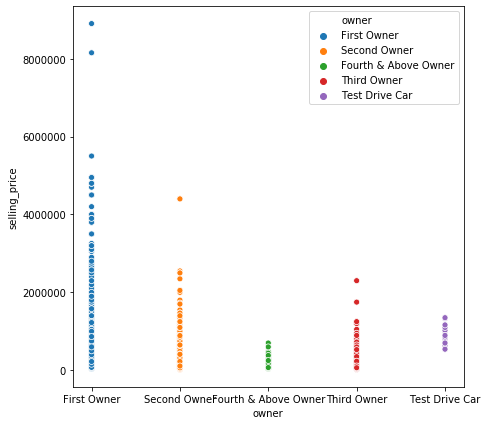

In [16]:
plt.figure(figsize=(7,7))
sns.scatterplot(y='selling_price' , x='owner', data=df, hue='owner')
plt.show()

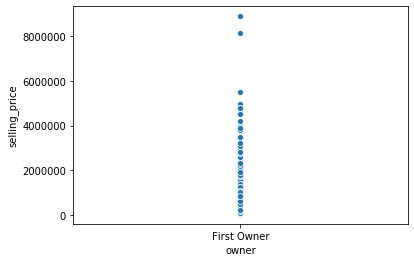

In [17]:
sns.scatterplot(x='owner', y='selling_price' , data=df[df['owner']=='First Owner'])

In [18]:
df[df['owner']=='First Owner']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...,...,...,...
4324,Maruti Alto 800 Base,2015,155000,40000,Petrol,Individual,Manual,First Owner
4332,Mahindra Scorpio S2 7 Seater,2015,750000,120000,Diesel,Individual,Manual,First Owner
4334,Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV,2012,600000,170000,Diesel,Individual,Manual,First Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [19]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [20]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


<h1> Feature Engineering

In [21]:
# Column vehicle name is of no use to ud, hence droppping that

In [22]:
df.drop(['name'],axis=1, inplace=True)

In [23]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [24]:
# Year column is useful when compared to present yaer to get the age of car

In [25]:
df['year'] = 2020 - df['year']

In [26]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,13,60000,70000,Petrol,Individual,Manual,First Owner
1,13,135000,50000,Petrol,Individual,Manual,First Owner
2,8,600000,100000,Diesel,Individual,Manual,First Owner
3,3,250000,46000,Petrol,Individual,Manual,First Owner
4,6,450000,141000,Diesel,Individual,Manual,Second Owner


In [27]:
df['car_age'] = df['year']
df.drop(['year'], axis=1, inplace=True)
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,60000,70000,Petrol,Individual,Manual,First Owner,13
1,135000,50000,Petrol,Individual,Manual,First Owner,13
2,600000,100000,Diesel,Individual,Manual,First Owner,8
3,250000,46000,Petrol,Individual,Manual,First Owner,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,6


<h3> Converting the categorical column to numerical

In [28]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [29]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [30]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [31]:
# Using one hot encoding to convert the Categorical Columns into Numerical

In [32]:
final_df = pd.get_dummies(df , drop_first=True)

In [33]:
final_df.head()

,selling_price,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0


<h1> EDA

In [34]:
# Since the no of features are not large we can see the correlation suing the pair plot

<Figure size 1440x1440 with 0 Axes>

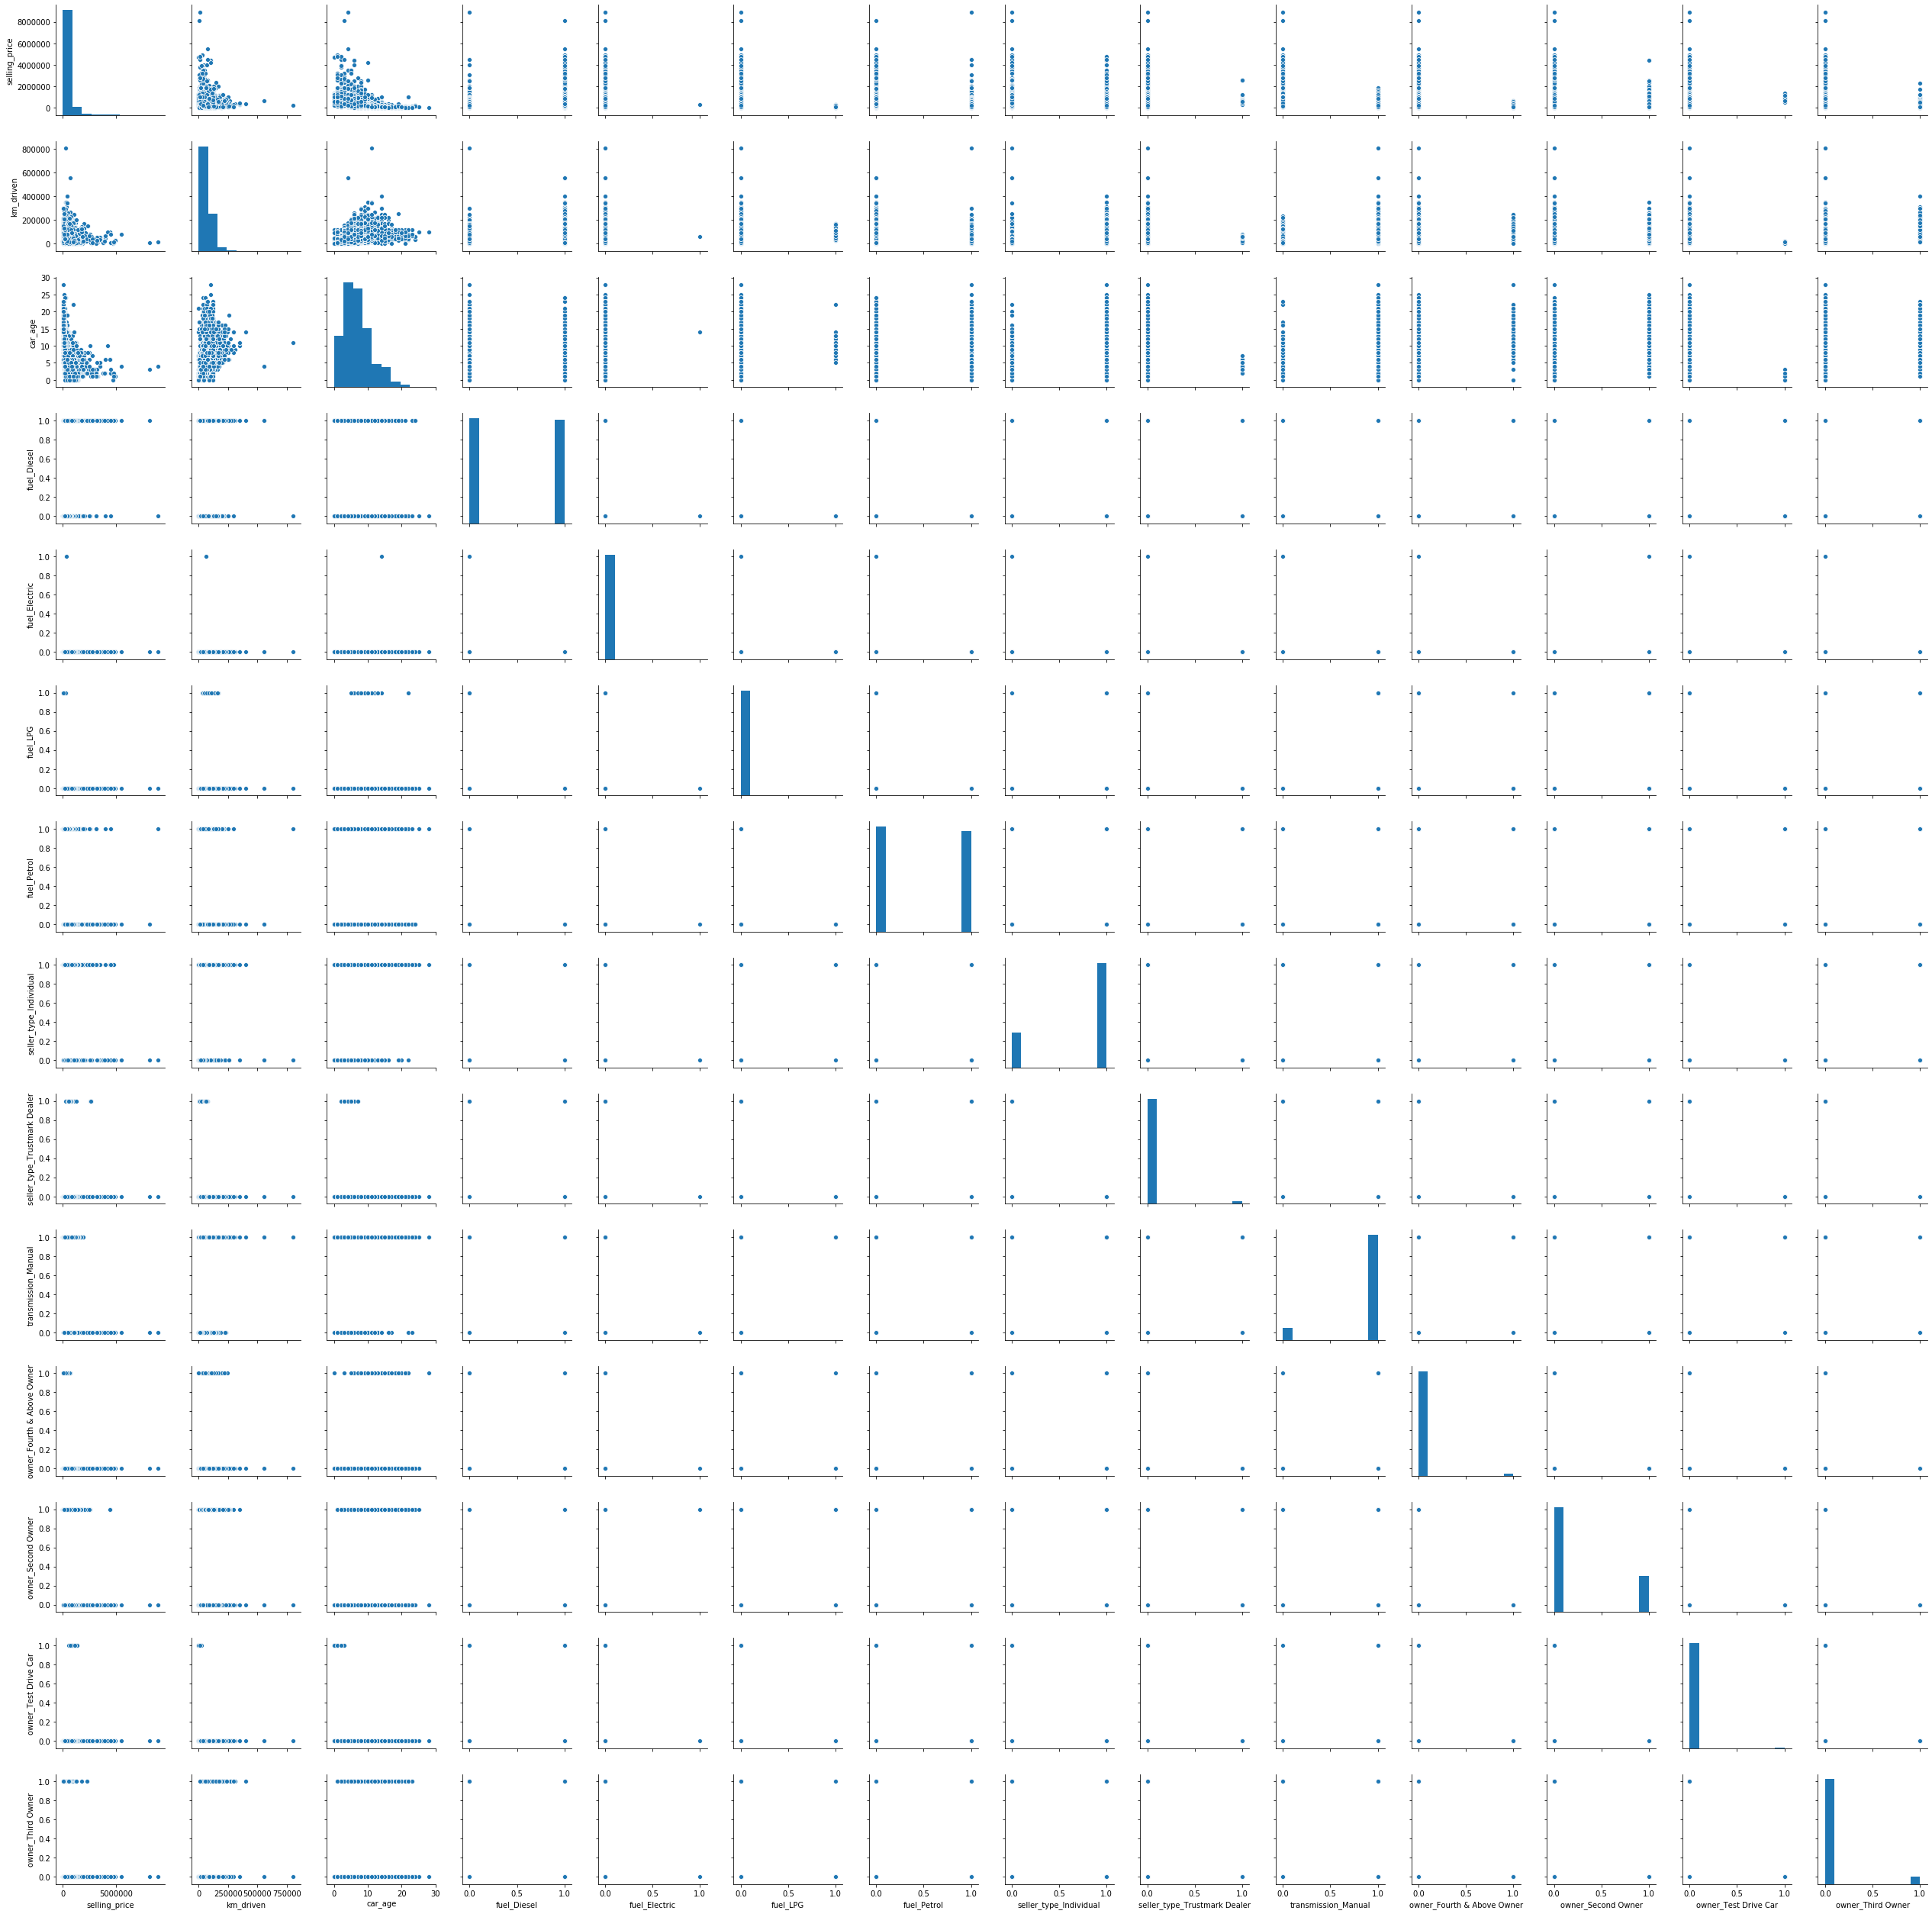

In [35]:
plt.figure(figsize=(20,20))
sns.pairplot(final_df)
plt.show()

In [36]:
# Correlation 

In [37]:
final_df.corr(method='pearson')

,selling_price,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
car_age,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


In [38]:
corrmat = final_df.corr(method='spearman')
corrmat

,selling_price,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.324051,-0.695845,0.384020,-0.003266,-0.077938,-0.363209,-0.278979,0.166061,-0.350510,-0.145214,-0.236540,0.083158,-0.191839
km_driven,-0.324051,1.000000,0.569077,0.302597,0.002200,0.046608,-0.313062,0.219758,-0.104345,0.143027,0.113280,0.262069,-0.103265,0.208577
car_age,-0.695845,0.569077,1.000000,-0.074399,0.022888,0.056798,0.066052,0.165863,-0.105812,0.159035,0.153215,0.320519,-0.103067,0.242053
fuel_Diesel,0.384020,0.302597,-0.074399,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.003266,0.002200,0.022888,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.077938,0.046608,0.056798,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.363209,-0.313062,0.066052,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.278979,0.219758,0.165863,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.166061,-0.104345,-0.105812,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.350510,0.143027,0.159035,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


In [39]:
corrmat.index

Index(['selling_price', 'km_driven', 'car_age', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

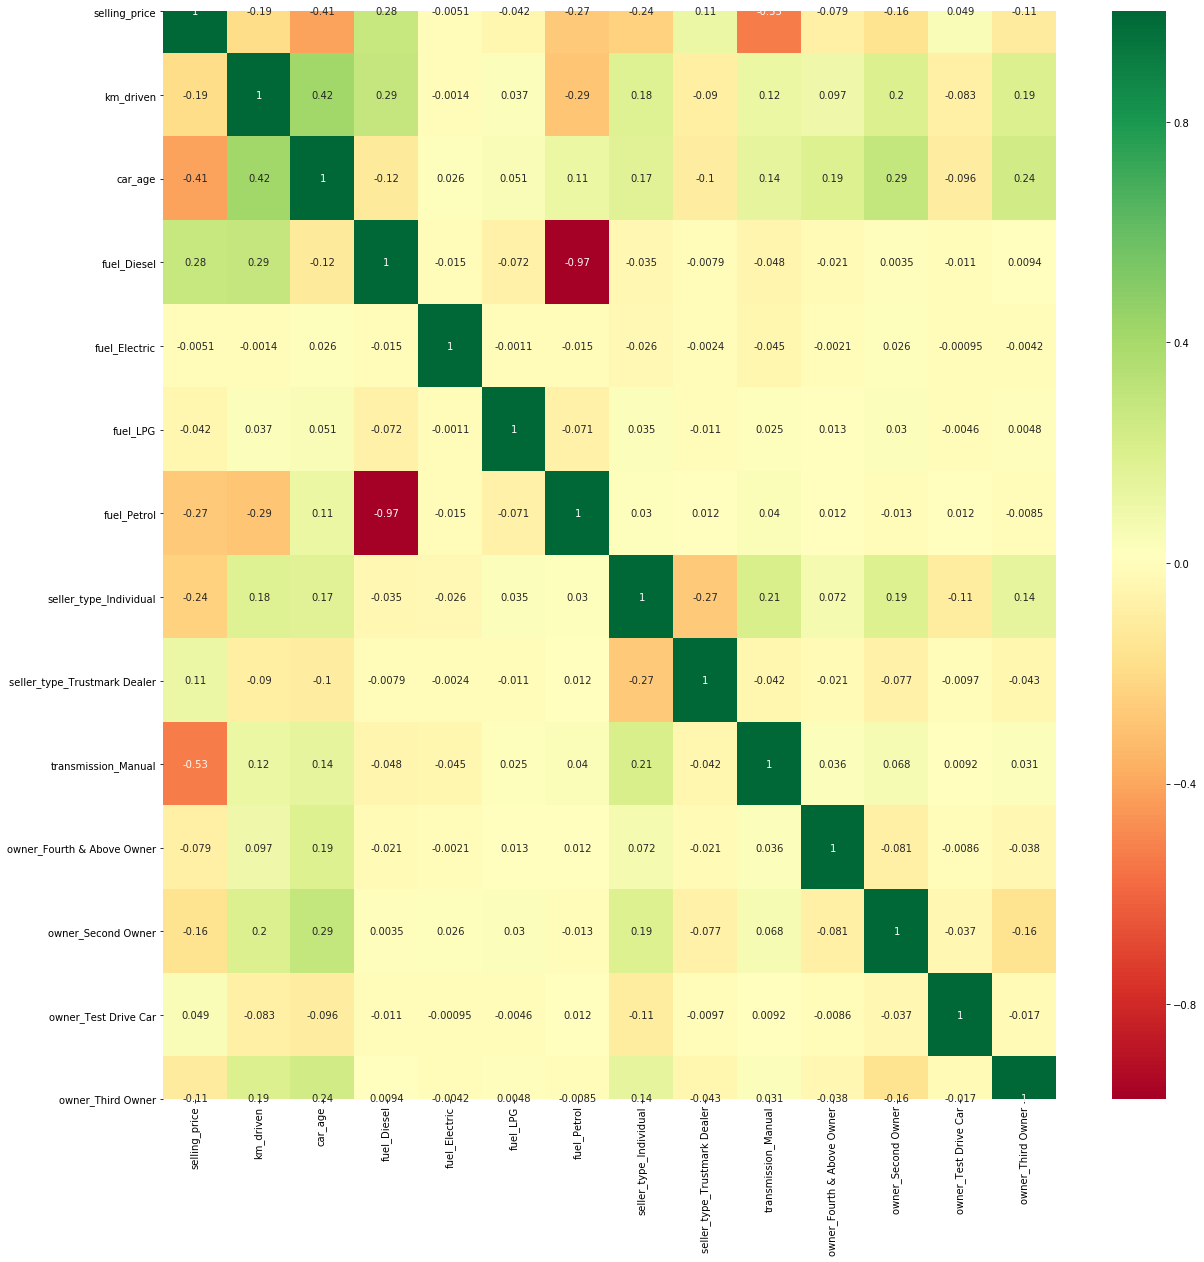

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(final_df[corrmat.index].corr(), annot=True, cmap="RdYlGn")
plt.show()

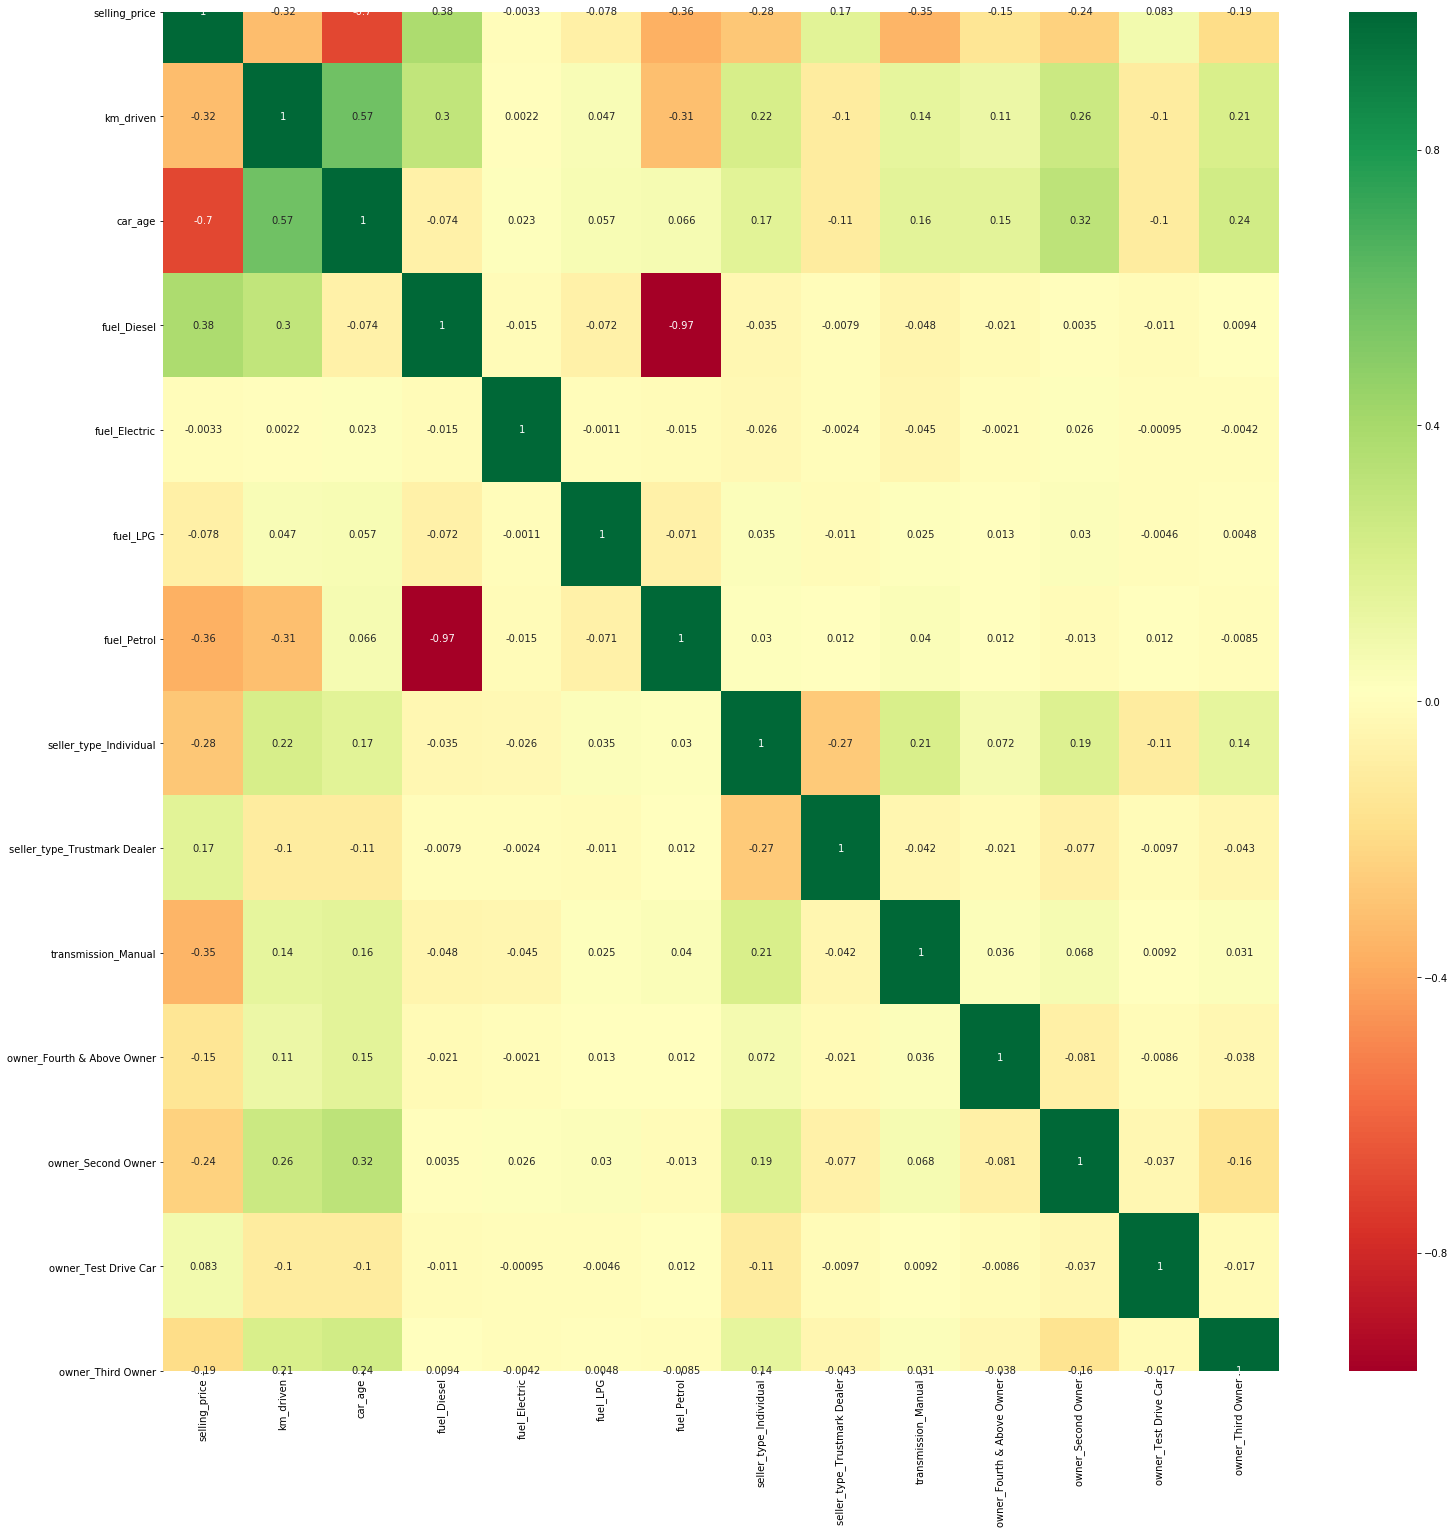

In [41]:
plt.figure(figsize=(25,25))
sns.heatmap(final_df[corrmat.index].corr(method='spearman'), annot=True, cmap="RdYlGn")
plt.show()

By seeing the corelstion matrix features can be dropped

In [42]:
final_df.shape

(4340, 14)

In [43]:
final_df.head()

,selling_price,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [44]:
x = final_df.iloc[:,1:]
y = final_df.iloc[:,0]

In [45]:
x.head()

,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [46]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

<h3> Feature importance

fitting data to tree regressor and getting the top features

In [47]:
from sklearn.ensemble import ExtraTreesRegressor

In [48]:
    model = ExtraTreesRegressor()
    model.fit(x,y)

C:\Users\shaur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [49]:
model.feature_importances_

array([2.32926801e-01, 2.55023998e-01, 1.31108898e-01, 1.29100025e-07,
       2.74607135e-05, 3.44589688e-04, 5.12751139e-02, 8.24905040e-03,
       2.92827835e-01, 6.89489004e-04, 2.07178012e-02, 2.51835932e-03,
       4.29047458e-03])

In [50]:
feat_importance = pd.Series(model.feature_importances_ , index = x.columns)
feat_importance

km_driven                       2.329268e-01
car_age                         2.550240e-01
fuel_Diesel                     1.311089e-01
fuel_Electric                   1.291000e-07
fuel_LPG                        2.746071e-05
fuel_Petrol                     3.445897e-04
seller_type_Individual          5.127511e-02
seller_type_Trustmark Dealer    8.249050e-03
transmission_Manual             2.928278e-01
owner_Fourth & Above Owner      6.894890e-04
owner_Second Owner              2.071780e-02
owner_Test Drive Car            2.518359e-03
owner_Third Owner               4.290475e-03
dtype: float64

In [51]:
# getting the top requred features 

top_fea = feat_importance.nlargest(5)
top_fea

transmission_Manual       0.292828
car_age                   0.255024
km_driven                 0.232927
fuel_Diesel               0.131109
seller_type_Individual    0.051275
dtype: float64

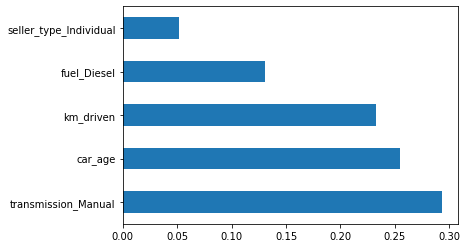

In [52]:
top_fea.plot(kind='barh')
plt.show()

In [53]:
# here we can keep the top required features and leave the rest

<h3> Splitting the dataset

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [56]:
print(x_train.shape)
print(x_test.shape)

(3472, 13)
(868, 13)


Trainig on the base model - DECISION TREE

In [63]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [69]:
depth = [3,4,5,6,7,8,9,10, 15, 16]

In [70]:
for d in depth:
    model = DecisionTreeRegressor(criterion='mse', 
                                  max_depth=d,
                                  max_features='sqrt'
                                  random_state=0)
    
    model.fit(x_train,y_train)
    predicted_price = model.predict(x_test)
    mse = mean_squared_error(y_test , predicted_price)
    print("At depth = {} , loss is = {}".format(d , mse))
    
    
    

At depth = 3 , loss is = 218864551727.41223
At depth = 4 , loss is = 203034742992.90448
At depth = 5 , loss is = 177757171480.48065
At depth = 6 , loss is = 217553096113.8166
At depth = 7 , loss is = 217268330346.06763
At depth = 8 , loss is = 227768314794.44467
At depth = 9 , loss is = 221532011751.6008
At depth = 10 , loss is = 231612163675.0544
At depth = 15 , loss is = 231055893638.50598
At depth = 16 , loss is = 232663790690.73074


Loss is hude so applying RANDOM FOREST

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
# Number of trees in Decison Tress in Random Forest Model
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [74]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [77]:
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, 
                               cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = 1)

In [78]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.7min finished
C:\Users\shaur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


Getting the best parameters for Random Search

In [80]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [94]:
rf_random.best_score_

-98034355293.88083

In [81]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [82]:
prediction = rf_random.predict(x_test)

In [83]:
x_test.head()

,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
2455,41988,7,1,0,0,0,0,0,1,0,0,0,0
808,53600,8,1,0,0,0,0,0,1,0,0,0,0
3161,23000,4,0,0,0,1,0,0,1,0,1,0,0
28,33000,7,1,0,0,0,1,0,1,0,1,0,0
4300,49600,9,1,0,0,0,0,0,0,0,0,0,0


In [86]:
prediction[0:5]

array([ 708708.        ,  344234.999     ,  444996.6357619 ,
        321434.31809524, 1210593.5       ])

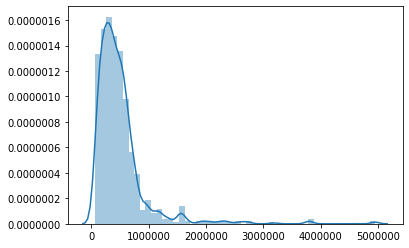

In [87]:
sns.distplot(prediction)

This shows predictions we got, have Normal Distribution, ie.e model is good

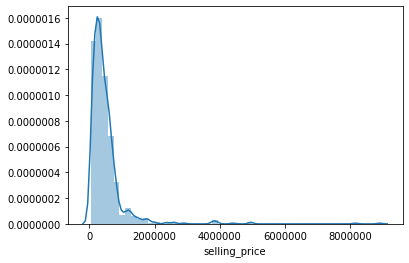

In [88]:
sns.distplot(y_test)

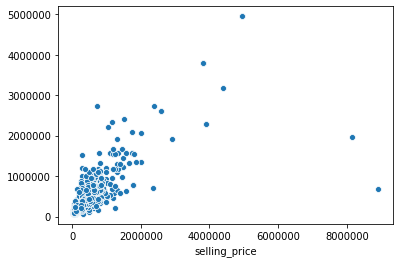

In [90]:
# Scatter plot used to see wether ytes and prediction are limear or not, more the linear better the model

sns.scatterplot(x=y_test , y=prediction)

Ploting difference between (Y_test & Prediction)

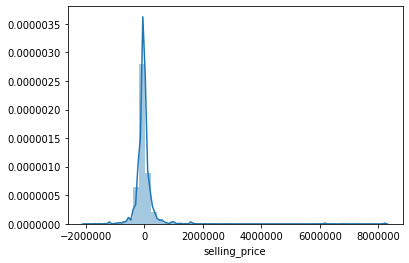

In [91]:
sns.distplot(y_test-prediction)

As the plot is normally distrubuted with little varaince
This shows the difference between Actual And predicted is not soo much<br>
Hence model is fine

<h2> Saving the model

In [92]:
import pickle

In [93]:
# open a desired name file
file = open('carpredict_regressor_model.pkl', 'wb')

# dump information to file
pickle.dump(rf_random, file)